# Momentum Strategy

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio

c:\Users\ryan\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## Import data (daily stock data)

In [3]:
path = r'C:\Users\ryan\Documents\Quant-Strategies\Classic Strategies\data'
file_name = '000300_1day.csv'
input_file = os.path.join(path, file_name)
df = pd.read_csv(input_file)
df.head(3)

,time,code,open,high,low,close,volume,amount
0,2010-01-04 15:00:00,sse.000300,3592.47,3597.75,3535.23,3535.23,66101080,9.341984e+10
1,2010-01-05 15:00:00,sse.000300,3545.19,3577.53,3497.66,3564.04,85809641,1.283020e+11
2,2010-01-06 15:00:00,sse.000300,3558.70,3588.83,3541.17,3541.73,78473125,1.210460e+11


In [4]:
df['time'] = df['time'].str.split(' ').apply(lambda x: x[0])
df.set_index('time', inplace=True)
df = df[['close']]
df.dropna(inplace=True)
df.head(3)

,close
time,
2010-01-04,3535.23
2010-01-05,3564.04
2010-01-06,3541.73


## Strategy implementation
We use *np.log()* to compute the stock daily return, and use *np.sign()* to determine the position.      
In below cells, we will apply *np.exp* to get the true return.

Position:       
1-->Full buying (满仓买入)      
0-->Short position (空仓)        
-1-->Full margin (满仓融券)

In [5]:
df['return'] = np.log(df['close']/df['close'].shift(1))
df['position'] = np.sign(df['return'])
df.head(3)

,close,return,position
time,,,
2010-01-04,3535.23,NaN,NaN
2010-01-05,3564.04,0.008116,1.0
2010-01-06,3541.73,-0.006279,-1.0


In [6]:
df['s_return'] = df['position'].shift(1)*df['return']
df.head()

,close,return,position,s_return
time,,,,
2010-01-04,3535.23,NaN,NaN,NaN
2010-01-05,3564.04,0.008116,1.0,NaN
2010-01-06,3541.73,-0.006279,-1.0,-0.006279
2010-01-07,3471.46,-0.020040,-1.0,0.020040
2010-01-08,3480.13,0.002494,1.0,-0.002494


## Return visualization
Here we have derived the strategy return, and we need to further derive the cumulative return and show the result

<AxesSubplot:xlabel='time'>

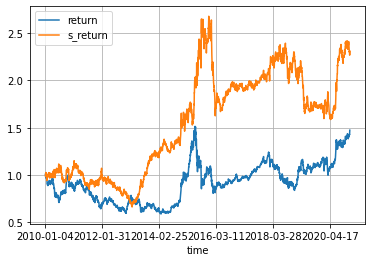

In [9]:
df[['return', 's_return']].cumsum().apply(np.exp).plot(grid=True)

## Strategy Optimization

### Use moving average instead of daily return (均线代替日线)
Since the signal of the strategy only depends on the index's positive and negative yields, it will appear when the yield changes are not obvious, but still trade. There are transaction frictions (such as handling/management fees) in the real market, and we need to control the frequency of trading and opening positions to reduce such fees.

In [10]:
df['position_new'] = np.sign(df['return'].rolling(5).mean())
df['s_return_new'] = df['position_new'].shift(1)*df['return']

### Return visualization (with above adjustment)

<AxesSubplot:xlabel='time'>

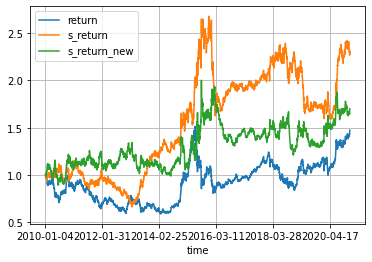

In [11]:
df[['return','s_return','s_return_new']].cumsum().apply(np.exp).plot(grid=True)